### Taller 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [4]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [5]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(318, 10)
(80, 10)


Etiquetas

In [6]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [7]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [8]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [9]:
norm = tf.keras.layers.Normalization()

In [10]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [11]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [12]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [13]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 23.9875 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.5097 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1490 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.3475 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.6907 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.4468 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.1301 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - loss: 18.4746 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.8151 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.8963 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.8318 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [15]:
hist.head()

,loss,val_loss,epoch
0,23.766932,20.898445,0
1,22.966940,20.098450,1
2,22.166946,19.298458,2
3,21.366951,18.498463,3
4,20.566956,17.698467,4


In [16]:
import matplotlib.pyplot as plt

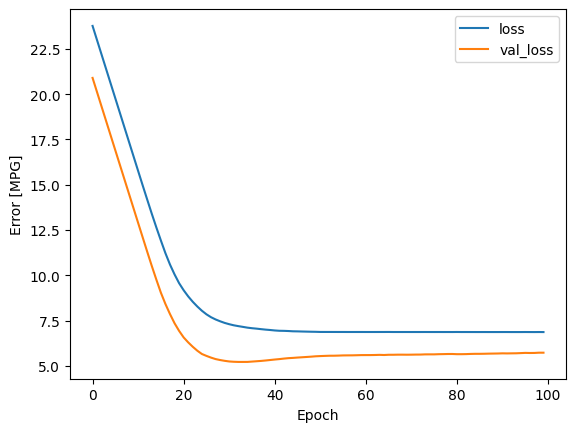

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

creación de 3 casos diferentes al modelo base

Modelo 1

In [18]:
model3_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [19]:
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history31 = model3_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 24.0871 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.0961 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.4027 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.1423 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.1209 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.2243 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.5710 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.7963 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.7235 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.2643 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.7742 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [21]:
hist1 = pd.DataFrame(history31.history)
hist1['epoch'] = history31.epoch
hist1['model'] = 'Model_1'

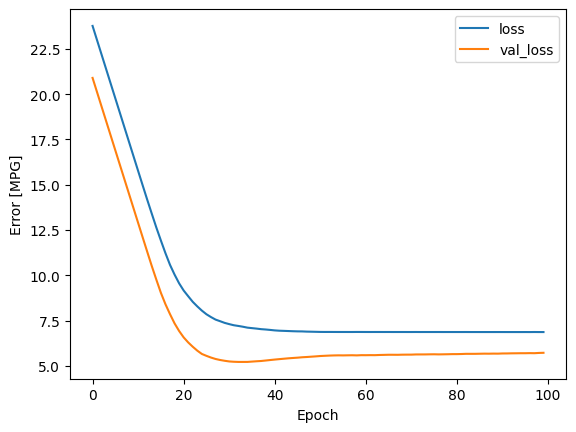

In [22]:
plt.plot(history31.history['loss'], label='loss')
plt.plot(history31.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [23]:
model3_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [24]:
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
%%time
history32 = model3_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.2328 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.0555 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.3499 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.7676 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.1472 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.0861 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.9953 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.2993 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.3390 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.3494 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.0688 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step -

In [26]:
hist2 = pd.DataFrame(history32.history)
hist2['epoch'] = history32.epoch
hist2['model'] = 'Model_2'

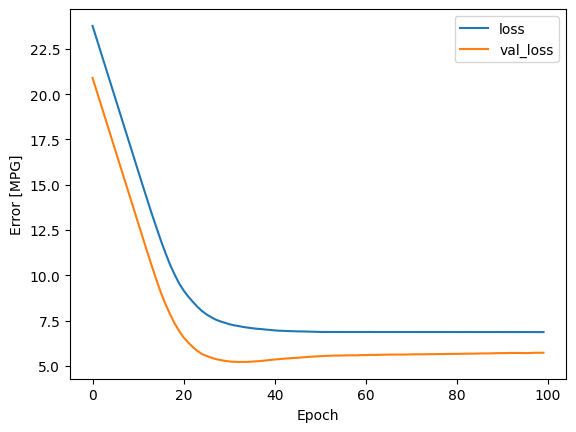

In [27]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [28]:
model3_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [29]:
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [30]:
%%time
history33 = model3_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 24.1342 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.3359 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.8950 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.0428 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.9328 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.4655 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.0939 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.6160 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.1720 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.9528 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.7325 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

In [31]:
hist3 = pd.DataFrame(history33.history)
hist3['epoch'] = history33.epoch
hist3['model'] = 'Model_3'

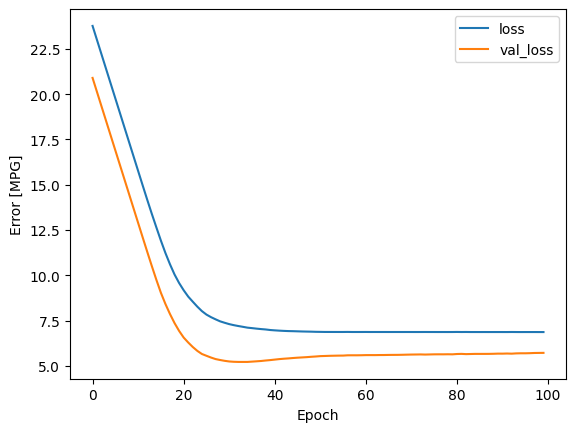

In [32]:
plt.plot(history33.history['loss'], label='loss')
plt.plot(history33.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [44]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [34]:
import seaborn as sns


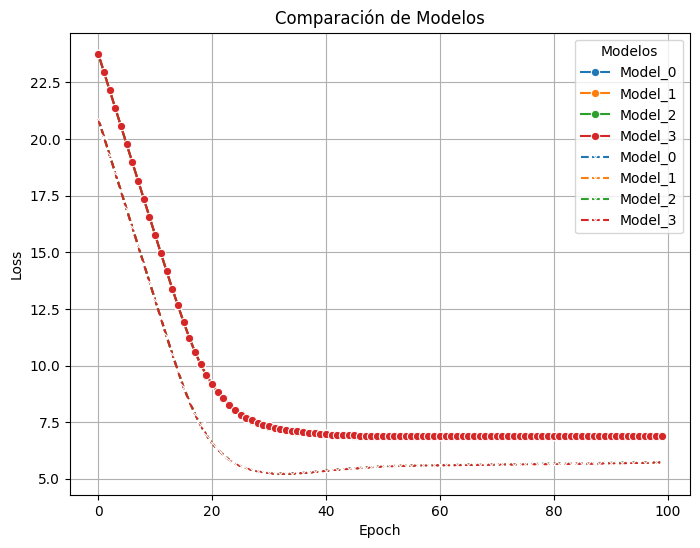

In [45]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

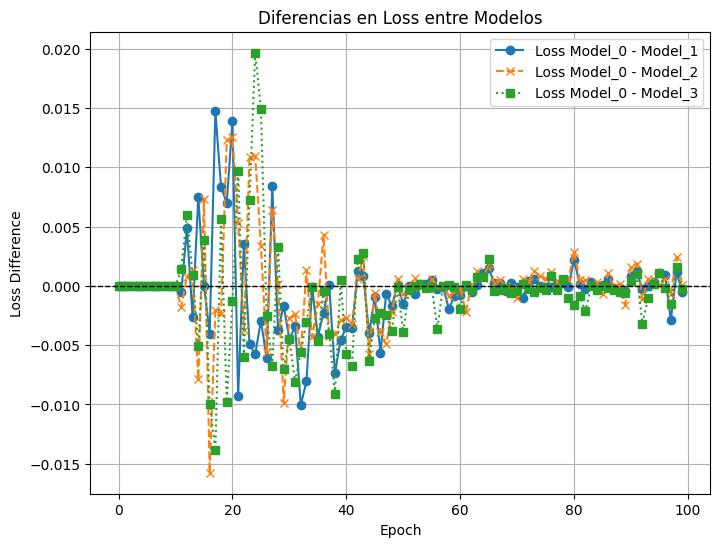

In [ ]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()
